In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

house = load_boston()
house.keys()
house_df = pd.DataFrame(house.data, columns = house.feature_names)
house_df.head()
house_df['PRICE'] = house.target
house_df.to_pickle('dataset/house_df.pkl')
house_df = pd.read_pickle('dataset/house_df.pkl')
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = house_df['PRICE']
X_data = house_df.drop('PRICE',axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: {0:.4f}, RMSE: {1:.4f}, R2 score: {2:.4f}'.format(mse,rmse,r2))
print('절편 값: ',lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

MSE: 19.8313, RMSE: 4.4532, R2 score: 0.7836
절편 값:  46.39649387182395
회귀 계수값:  [ -0.1   0.1   0.1   2.4 -21.5   2.8   0.   -1.5   0.3  -0.   -1.    0.
  -0.6]


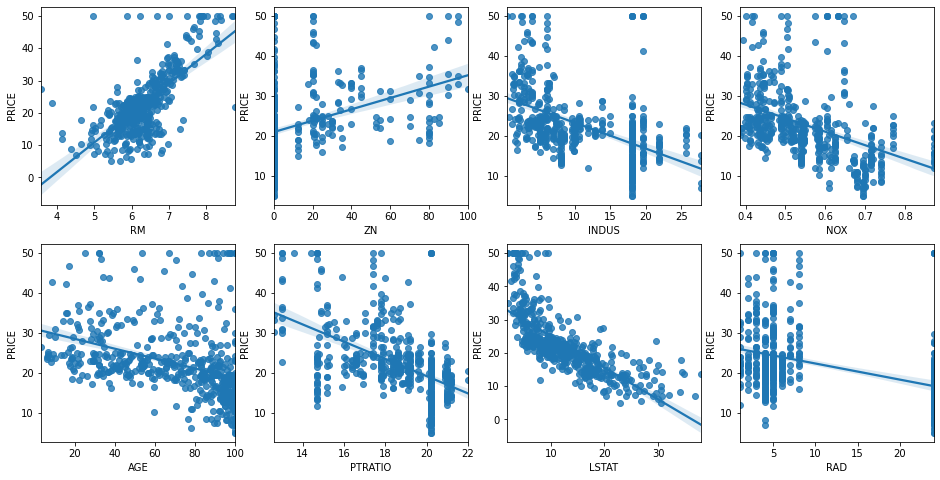

In [11]:
# 2개의 행과 4개의 열을 가진 subplot 이용. axs는 4*2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 regplot을 이용해서 산점도와 선형회귀직선을 함께 표현
    sns.regplot(x=feature, y='PRICE',data=house_df,ax=axs[row][col])